In [1]:
import numpy as np
import pandas as pd
#from sklearn.linear_model import LogisticRegression, LinearRegression
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier

<font size="5">**Visualizing the data**</font>

In [2]:
data = pd.read_csv("Oracle_top_1.csv")
data.head()

,Mobilenet_v1,Inception_v4,Resnet_v1_152
0,1,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


<font size="4">Here, the proportion of outputs (0 or 1) are shown for Mobilenet, Inception and Resnet.</font>

Mobilenet 1: 71.02%, 0: 28.98%
Inception 1: 11.80%, 0: 88.20%
Resnet 1: 3.47%, 0: 96.53%


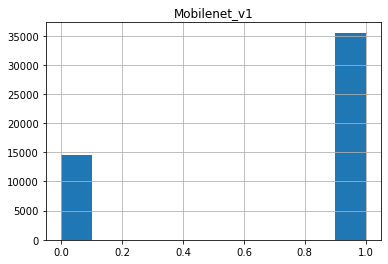

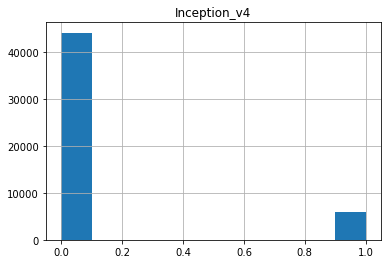

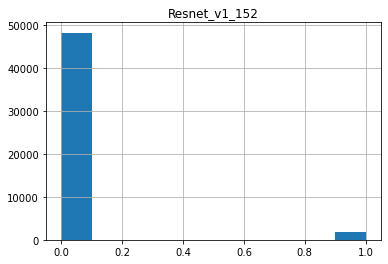

In [3]:
from collections import Counter

data.hist(column = 'Mobilenet_v1')        
mobilenet = Counter(data['Mobilenet_v1'])
print("Mobilenet 1: {:.2f}%, 0: {:.2f}%".format(mobilenet[1]/(mobilenet[0] + mobilenet[1]) * 100, mobilenet[0]/(mobilenet[0] + mobilenet[1]) * 100))
data.hist(column = 'Inception_v4')      
inception = Counter(data['Inception_v4'])
print("Inception 1: {:.2f}%, 0: {:.2f}%".format(inception[1]/(inception[0] + inception[1]) * 100, inception[0]/(inception[0] + inception[1]) * 100))
data.hist(column = 'Resnet_v1_152')      
resnet = Counter(data['Resnet_v1_152'])
print("Resnet 1: {:.2f}%, 0: {:.2f}%".format(resnet[1]/(resnet[0] + resnet[1]) * 100, resnet[0]/(resnet[0] + resnet[1]) * 100))          # Shift + O to display fully

<font size="5">**Comparing the predictions with true values**</font>

<font size="4">KNN premodel</font>

In [4]:
preds = pd.read_csv("knn_predictions.csv")
preds.head()

,filename,Mobilenet_v1,Inception_v4,Resnet_v1_152
0,1,0,1,0
1,2,1,0,0
2,3,0,1,0
3,4,0,1,0
4,5,0,1,0


In [5]:
y_true = data['Mobilenet_v1']
y_preds = preds['Mobilenet_v1']
print("Accuracy for Mobilenet = {}".format(accuracy_score(y_true, y_preds)))

y_true = data['Inception_v4']
y_preds = preds['Inception_v4']
print("Accuracy for Inception = {}".format(accuracy_score(y_true, y_preds)))

y_true = data['Resnet_v1_152']
y_preds = preds['Resnet_v1_152']
print("Accuracy for Resnet = {}".format(accuracy_score(y_true, y_preds)))

Accuracy for Mobilenet = 0.46918
Accuracy for Inception = 0.44512
Accuracy for Resnet = 0.95612


In [6]:
from collections import Counter

print("Resnet true output counts = 0: {}, 1: {}".format(Counter(y_true)[0], Counter(y_true)[1]))
print("Resnet predicted output counts = 0: {}, 1: {}".format(Counter(y_preds)[0], Counter(y_preds)[1]))

Resnet true output counts = 0: 48267, 1: 1733
Resnet predicted output counts = 0: 49503, 1: 497


<font size="3">As we can see from this output, the premodel predicts 1 much less times than it should.</font>

<font size="4">Logistic Regression premodel</font>

In [7]:
preds = pd.read_csv("log_reg_predictions.csv")
preds.head()

,filename,Mobilenet_v1,Inception_v4,Resnet_v1_152
0,1,0,1,0
1,2,1,0,0
2,3,0,1,0
3,4,0,1,0
4,5,0,1,0


In [8]:
y_true = data['Mobilenet_v1']
y_preds = preds['Mobilenet_v1']
print("Accuracy for Mobilenet = {}".format(accuracy_score(y_true, y_preds)))

y_true = data['Inception_v4']
y_preds = preds['Inception_v4']
print("Accuracy for Inception = {}".format(accuracy_score(y_true, y_preds)))

y_true = data['Resnet_v1_152']
y_preds = preds['Resnet_v1_152']
print("Accuracy for Resnet = {}".format(accuracy_score(y_true, y_preds)))

import random

random_list = [random.randint(0, 1) for i in range(50000)]
y_true = data['Mobilenet_v1']
accuracy_score(y_true, random_list)
print("Random number generator accuracy for Mobilenet = {}".format(accuracy_score(y_true, random_list)))
y_true = data['Inception_v4']
accuracy_score(y_true, random_list)
print("Random number generator accuracy for Inception = {}".format(accuracy_score(y_true, random_list)))

Accuracy for Mobilenet = 0.47342
Accuracy for Inception = 0.42902
Accuracy for Resnet = 0.96534
Random number generator accuracy for Mobilenet = 0.50096
Random number generator accuracy for Inception = 0.50092


<font size="3">The randomly generated values have higher accuracy than the premodels, which shows that the premodels are not able to learn from the dataset.</font>

In [9]:
from collections import Counter

y_true = data['Resnet_v1_152']
print("Resnet true output counts = 0: {}, 1: {}".format(Counter(y_true)[0], Counter(y_true)[1]))
print("Resnet predicted output counts = 0: {}, 1: {}".format(Counter(y_preds)[0], Counter(y_preds)[1]))

Resnet true output counts = 0: 48267, 1: 1733
Resnet predicted output counts = 0: 50000, 1: 0


<font size="3">Here, the premodel never predicted 1.</font>